In [99]:
import pandas as pd
import scipy 
import numpy as np
from scipy import stats

## Assignment1 - 2 Sample t Test

In [102]:
units=pd.read_csv('D://DataScience/Assignments/3-Hypothesis Testing/Cutlets.csv')
units.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


{'whiskers': [<matplotlib.lines.Line2D at 0x2031e5cfb20>,
 'caps': [<matplotlib.lines.Line2D at 0x2031e5cf8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2031e5cf6d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2031ea58340>,
 'fliers': [<matplotlib.lines.Line2D at 0x2031ea58e50>,
 'means': [<matplotlib.lines.Line2D at 0x2031ea58b20>,
  <matplotlib.lines.Line2D at 0x2031eaa9af0>]}

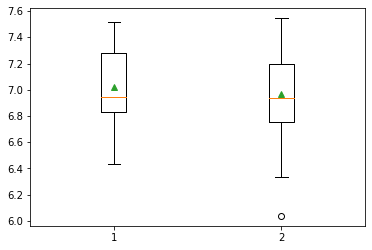

In [109]:
#Check boxplot to visually check means are same
plt.boxplot(units,showmeans=True)

In [ ]:
## Normality test

In [106]:
def Q_Q(units,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    units[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(units[feature],dist='norm',plot=pylab)
    plt.show()

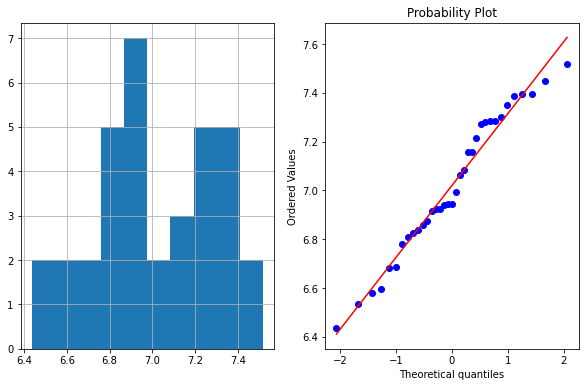

In [107]:
Q_Q(units,'Unit A')

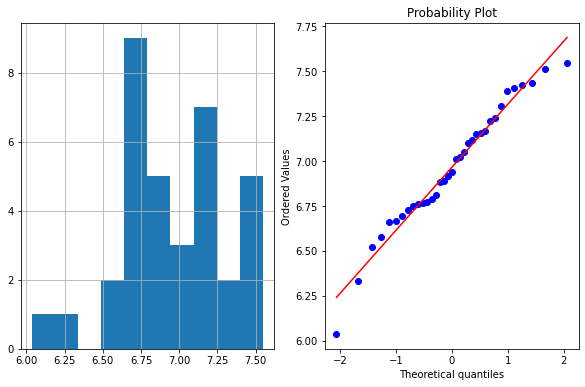

In [108]:
Q_Q(units,'Unit B')

In [112]:
UnitA = stats.shapiro(units['Unit A'])
UnitB = stats.shapiro(units['Unit B'])
print(UnitA,'/',UnitB)

ShapiroResult(statistic=0.9649458527565002, pvalue=0.3199819028377533) / ShapiroResult(statistic=0.9727300405502319, pvalue=0.5224985480308533)


In [123]:
statistics,p=stats.ttest_ind(units['Unit A'],units['Unit B'])
print ('p= %.3f' % (p))

p= 0.472


## No significant difference between Unit A and Unit B diameter

## Assignment2 - ANOVA

In [3]:
lab=pd.read_csv('D://DataScience/Assignments/3-Hypothesis Testing/LabTAT.csv')

In [23]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [24]:
#rename the columns
lab.columns=['lab1','lab2','lab3','lab4']
lab.head()

,lab1,lab2,lab3,lab4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [55]:
lab.iloc[:,0].mean(),lab.iloc[:,1].mean(),lab.iloc[:,2].mean(),lab.iloc[:,3].mean()

(178.36158333333339, 178.9029166666668, 199.91325000000003, 163.6827499999999)

{'whiskers': [<matplotlib.lines.Line2D at 0x20316890220>,
 'caps': [<matplotlib.lines.Line2D at 0x2031d87cfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20316890ca0>,
 'medians': [<matplotlib.lines.Line2D at 0x20316707f40>,
 'fliers': [<matplotlib.lines.Line2D at 0x203162a4820>,
 'means': [<matplotlib.lines.Line2D at 0x203176ce9a0>,
  <matplotlib.lines.Line2D at 0x2031da5d400>]}

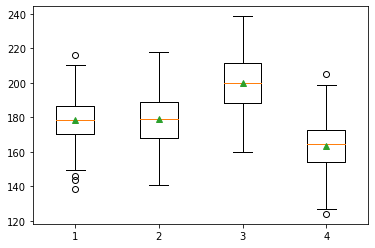

In [53]:
#Check boxplot to visually check means are same
plt.boxplot(lab,showmeans=True)

## Q-Q Plot

In [34]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: cannot import name 'stat' from 'scipy' (C:\Users\jeysu_000\anaconda3\lib\site-packages\scipy\__init__.py)

In [38]:
def Q_Q(lab,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    lab[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(lab[feature],dist='norm',plot=pylab)
    plt.show()

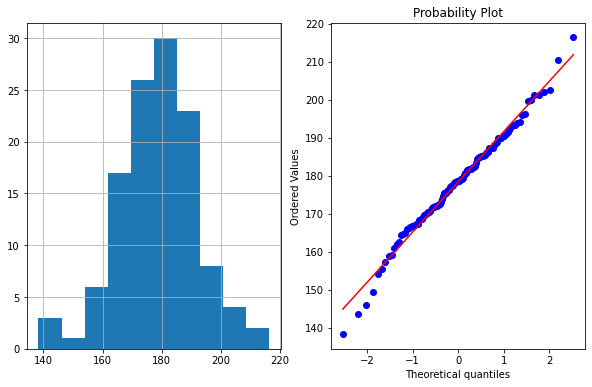

In [39]:
Q_Q(lab,'lab1')

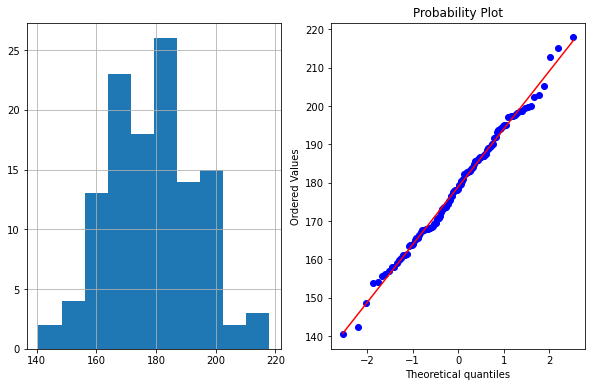

In [40]:
Q_Q(lab,'lab2')

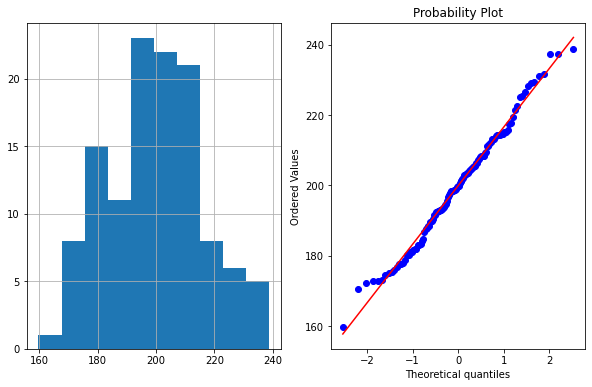

In [41]:
Q_Q(lab,'lab3')

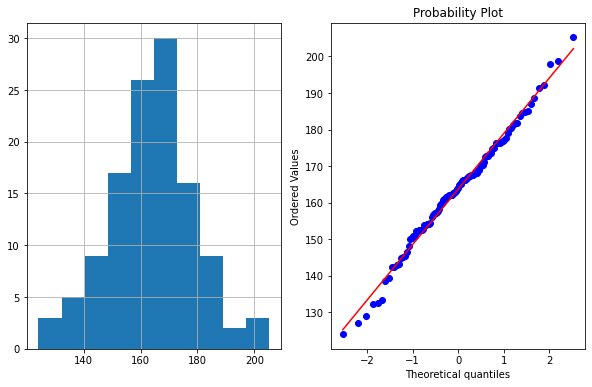

In [45]:
Q_Q(lab,'lab4')

Data is normally distributed

In [94]:
lab1 = stats.shapiro(lab.lab1)
lab2 = stats.shapiro(lab.lab2)
lab3 = stats.shapiro(lab.lab3)
lab4= stats.shapiro(lab.lab4)
print(lab1,'/',lab2,'/',lab3,'/',lab4)

ShapiroResult(statistic=0.9901824593544006, pvalue=0.5506953597068787) / ShapiroResult(statistic=0.9936322569847107, pvalue=0.8637524843215942) / ShapiroResult(statistic=0.9886345267295837, pvalue=0.4205053448677063) / ShapiroResult(statistic=0.9913753271102905, pvalue=0.6618951559066772)


In [66]:
f,p=stats.f_oneway(lab.lab1,lab.lab2,lab.lab3,lab.lab4)

In [96]:
print('F-Statistic=%.3f, p=%.3f' % (f, p))

F-Statistic=118.704, p=0.000


In [98]:
if p<0.05:
    print("Reject null hypothesis, Hence there is a significant diffrence between lab's TAT averages")
else:
    print("Accept null hypothesis, there is no difference among lab TAT Avges")

Reject null hypothesis, Hence there is a significant diffrence between lab's TAT averages


## Assignment 3 - Chi Square Test

In [124]:
import seaborn as sns

In [130]:
ratio=pd.read_csv("D://DataScience/Assignments/3-Hypothesis Testing/BuyerRatio.csv")
ratio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [146]:
#Contigency Table
table=[[50,142,131,70],[435,1523,1356,750]]
table

[[50, 142, 131, 70], [435, 1523, 1356, 750]]

In [141]:
from scipy.stats import chi2_contingency

In [149]:
stat, p, dof, expected = chi2_contingency(table) 
print (stat, p, dof, expected)

1.595945538661058 0.6603094907091882 3 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [151]:
print("===Chi2 Stat===")
print(stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p)
print("\n")
print("===Contingency Table===")
print(expected)

===Chi2 Stat===
1.595945538661058


===Degrees of Freedom===
3


===P-Value===
0.6603094907091882


===Contingency Table===
[[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [150]:
#interpret
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (Accept H0)')

p value is 0.6603094907091882
Independent (Accept H0)


In [ ]:
p value greated than 0.05, Accept H0
Male and Female proportions are same

## Assignment 4 - Chi Square

In [164]:
order=pd.read_csv("D://DataScience/Assignments/3-Hypothesis Testing/Costomer+OrderForm.csv")
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [165]:
order.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [167]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
order['Phillippines']=label_encoder.fit_transform(order['Phillippines'])
order['Indonesia']=label_encoder.fit_transform(order['Indonesia'])
order['Malta']=label_encoder.fit_transform(order['Malta'])
order['India']=label_encoder.fit_transform(order['India'])
order.head()

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1


In [181]:
order.Phillippines.value_counts(),order.Indonesia.value_counts(),order.Malta.value_counts(),order.India.value_counts()

(1    271
 0     29
 Name: Phillippines, dtype: int64,
 1    267
 0     33
 Name: Indonesia, dtype: int64,
 1    269
 0     31
 Name: Malta, dtype: int64,
 1    280
 0     20
 Name: India, dtype: int64)

In [183]:
table=[[271,267,269,280],[29,33,31,20]]
table

[[271, 267, 269, 280], [29, 33, 31, 20]]

In [185]:
stat, p, dof, expected=chi2_contingency(table)

In [186]:
print("===Chi2 Stat===")
print(stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p)
print("\n")
print("===Contingency Table===")
print(expected)

===Chi2 Stat===
3.858960685820355


===Degrees of Freedom===
3


===P-Value===
0.2771020991233135


===Contingency Table===
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [ ]:
p value > 0.05, Accept H0
Defect in customer orders across all regions are same

## Assignment 5 - 2 Proportion Test

In [152]:
store=pd.read_csv("D://DataScience/Assignments/3-Hypothesis Testing/Faltoons.csv")
store

,Weekdays,Weekend
0,Male,Female
1,Female,Male
2,Female,Male
3,Male,Female
4,Female,Female
...,...,...
395,Female,Male
396,Female,Female
397,Female,Female
398,Female,Male


In [155]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
store['Weekdays']=label_encoder.fit_transform(store['Weekdays'])
store['Weekend']=label_encoder.fit_transform(store['Weekend'])
store.head()

,Weekdays,Weekend
0,1,0
1,0,1
2,0,1
3,1,0
4,0,0


In [157]:
store.Weekdays.mean(), store.Weekend.mean()

(0.2825, 0.4175)

In [160]:
import statsmodels.api as sm
sm.stats.ttest_ind(store.Weekdays, store.Weekend)

(-4.038383581687957, 5.9013879428528154e-05, 798.0)

In [ ]:
p value is < 0.05 and Rejest H0
Hence proportions are not same during weekend and weekday